In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv",index_col = 'PassengerId')
test_data = pd.read_csv("test.csv",index_col = 'PassengerId')
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [4]:
train_data[train_data['Name'].squeeze().str.contains("Hosono")==True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0,NaN,S


In [5]:
train_data.Age.isna().sum()

177

In [6]:
train_data.Age.values.sort()

In [7]:
#binning with range 
bins = [0,3,10,18,25,35,45, 60,80]
train_data["binned_age"] = pd.cut(train_data['Age'], bins)

In [8]:
binned_age = train_data.binned_age.unique().to_list()

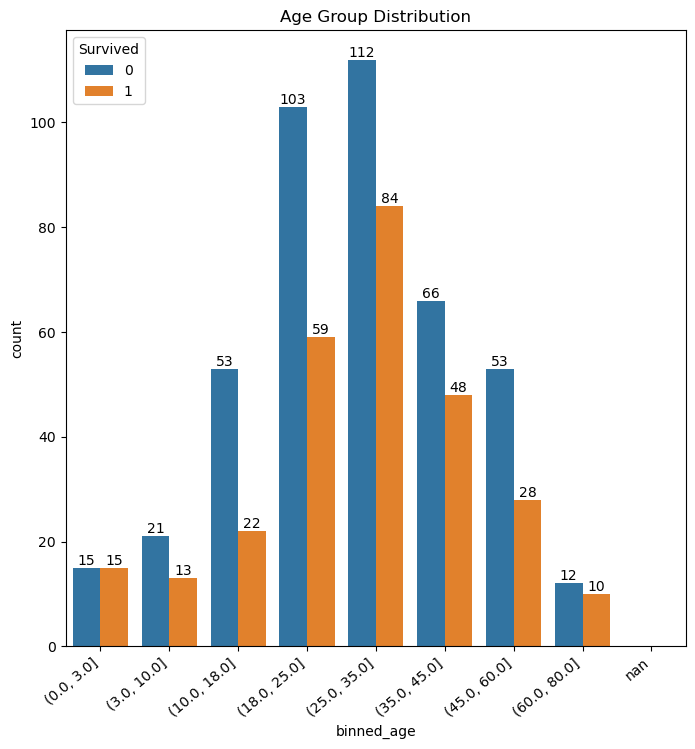

In [9]:
plt.figure(figsize=(8,8))
ax =sns.countplot(x='binned_age',data=train_data, order = binned_age,hue='Survived')
ax.set_xticklabels(binned_age,rotation=40,ha="right")
plt.title("Age Group Distribution")

for container in ax.containers:
    ax.bar_label(container)

C:\Users\hp\AppData\Local\Temp\ipykernel_3968\1242612852.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


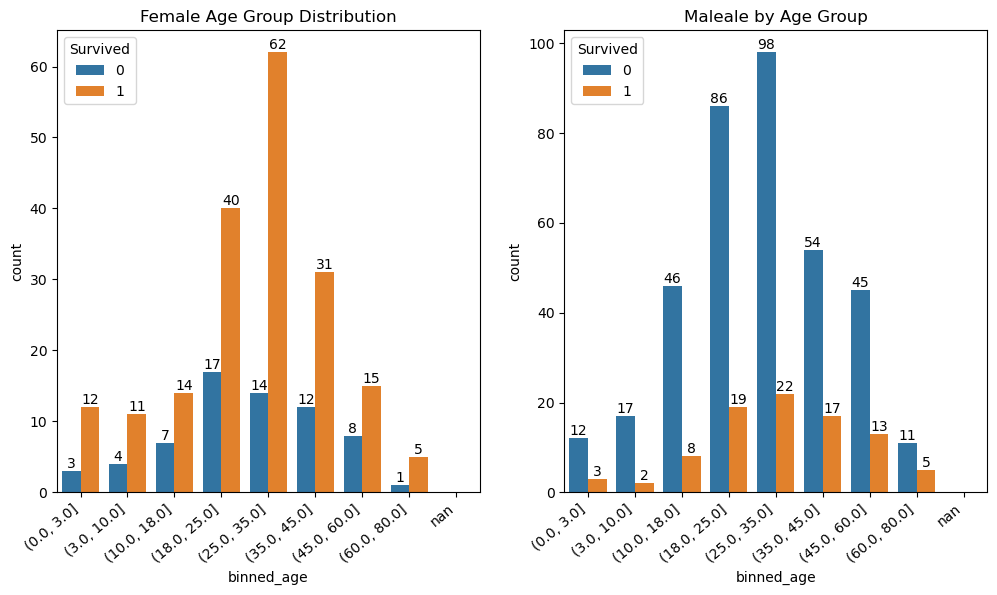

In [10]:
fig = plt.figure(figsize=(12,6))


ax1=fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


sns.countplot(x='binned_age',data=train_data[train_data.Sex=='female'], order = binned_age,hue='Survived',ax=ax1)
ax1.set_xticklabels(binned_age,rotation=40,ha="right")
ax1.title.set_text("Female Age Group Distribution")
for container in ax1.containers:
    ax1.bar_label(container)
    
sns.countplot(x='binned_age',data=train_data[train_data.Sex=='male'], order = binned_age,hue='Survived',ax=ax2)
ax2.set_xticklabels(binned_age,rotation=40,ha="right")
ax2.title.set_text("Female Age Group Distribution")
for container in ax2.containers:
    ax2.bar_label(container)
ax2.title.set_text('Maleale by Age Group')
fig.show()

In [11]:
train_data.dtypes

Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
binned_age    category
dtype: object

In [12]:
train_data['Age']=train_data.Age.fillna(train_data.Age.mean())
test_data['Age'] = test_data.Age.fillna(test_data.Age.mean())

In [13]:
train_data.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        2
binned_age    177
dtype: int64

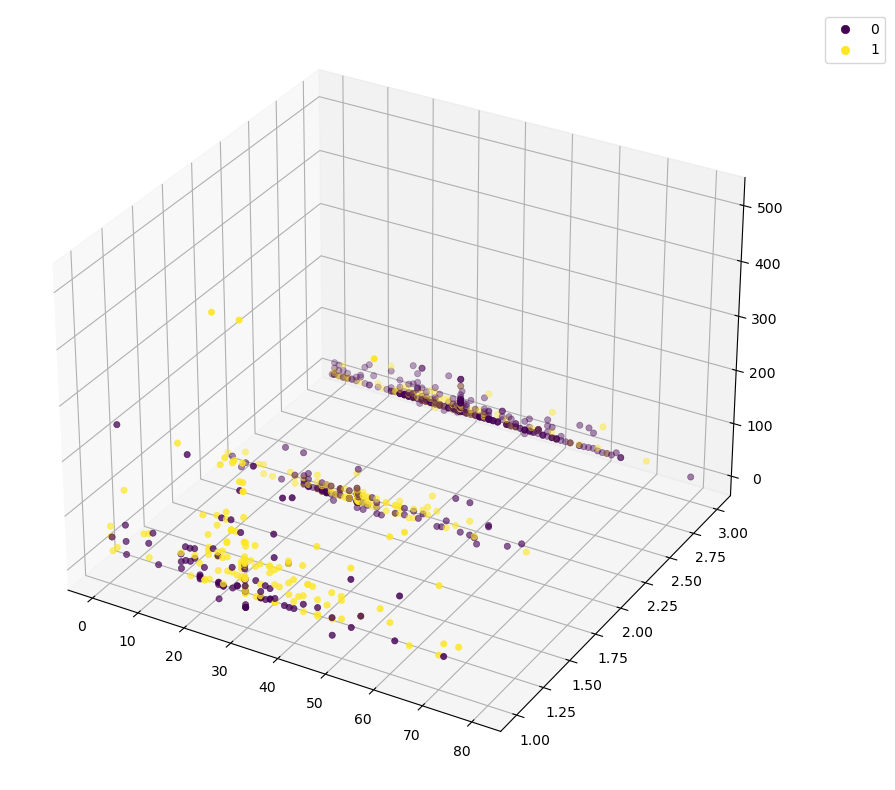

In [14]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
sc =ax.scatter(train_data.Age,train_data.Pclass,train_data.Fare,c=train_data.Survived,cmap = 'viridis', linewidth=0.5)
# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

In [15]:
targets =  train_data.Survived
features = train_data.drop('Survived',axis=1)

In [16]:

import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

features["Title"] = features.Name.apply(get_title)
test_data["Title"] =test_data.Name.apply(get_title)


features['Title'] = features['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
features['Title'] = features['Title'].replace('Mlle', 'Miss')
features['Title'] = features['Title'].replace('Ms', 'Miss')
features['Title'] = features['Title'].replace('Mme', 'Mrs')

test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')

In [17]:
#Onehot encoding
features = pd.concat([features,pd.get_dummies(features.Title)],axis=1)
test_data= pd.concat([test_data,pd.get_dummies(test_data.Title)],axis=1)

features = features.drop(['Title','Name'],axis=1)
test_data = test_data.drop(['Title','Name'],axis=1)

In [18]:
features['Sex'] = [0 if a =='male' else 1 for a in train_data.Sex]
features['Sex'] = features.Sex.astype('bool')

test_data['Sex'] = [0 if a =='male' else 1 for a in test_data.Sex]
test_data['Sex'] = test_data.Sex.astype('bool')

In [19]:
features.Cabin = features.Cabin.isna()
test_data.Cabin = test_data.Cabin.isna()

In [20]:
#Onehot encoding
features = pd.concat([features,pd.get_dummies(features.Embarked)],axis=1)
test_data= pd.concat([test_data,pd.get_dummies(test_data.Embarked)],axis=1)

In [21]:
features = features.drop('Embarked',axis=1)
test_data = test_data.drop('Embarked',axis=1)

In [22]:
#Onehot encoding
features = pd.concat([features,pd.get_dummies(features.Pclass)],axis=1)
features = features.drop('Pclass',axis=1)
test_data= pd.concat([test_data,pd.get_dummies(test_data.Pclass)],axis=1)
test_data = test_data.drop('Pclass',axis=1)

In [23]:
# remove Name and Ticket for this prediction
features = features.drop(['Ticket','binned_age'],axis=1)
test_data = test_data.drop(['Ticket'],axis=1)

In [24]:
features.isna().sum()

Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
Cabin     0
Master    0
Miss      0
Mr        0
Mrs       0
Rare      0
C         0
Q         0
S         0
1         0
2         0
3         0
dtype: int64

In [25]:
# one none value in Fare column
test_data['Fare'] = test_data.Fare.fillna(test_data.Fare.mean())

In [26]:

features['Family'] = features['SibSp']+ features['Parch']

features['FareperPerson'] = features.Fare/(features.Family +1)

test_data['Family'] = test_data['SibSp'] + test_data['Parch']

test_data['FareperPerson'] = test_data.Fare / (test_data.Family+1)

In [27]:
features['Alone'] = [1 if a>0 else 0 for a in features.Family]
test_data['Alone'] = [1 if a >0 else 0 for a in test_data.Family]

In [28]:
features

,Sex,Age,SibSp,Parch,Fare,Cabin,Master,Miss,Mr,Mrs,Rare,C,Q,S,1,2,3,Family,FareperPerson,Alone
PassengerId,,,,,,,,,,,,,,,,,,,,
1,False,0.420000,1,0,7.2500,True,0,0,1,0,0,0,0,1,0,0,1,1,3.62500,1
2,True,0.670000,1,0,71.2833,False,0,0,0,1,0,1,0,0,1,0,0,1,35.64165,1
3,True,0.750000,0,0,7.9250,True,0,1,0,0,0,0,0,1,0,0,1,0,7.92500,0
4,True,0.750000,1,0,53.1000,False,0,0,0,1,0,0,0,1,1,0,0,1,26.55000,1
5,False,0.830000,0,0,8.0500,True,0,0,1,0,0,0,0,1,0,0,1,0,8.05000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,False,29.699118,0,0,13.0000,True,0,0,0,0,1,0,0,1,0,1,0,0,13.00000,0
888,True,29.699118,0,0,30.0000,False,0,1,0,0,0,0,0,1,1,0,0,0,30.00000,0
889,True,29.699118,1,2,23.4500,True,0,1,0,0,0,0,0,1,0,0,1,3,5.86250,1


In [58]:

from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
#scaler = preprocessing.RobustScaler()


numeric_features = features.columns[1:5].to_list()
numeric_features.append('Family')
numeric_features.append('FareperPerson')

features[numeric_features] = scaler.fit_transform(features[numeric_features])
test_data[numeric_features] = scaler.transform(test_data[numeric_features])

In [59]:
from sklearn.model_selection import StratifiedKFold

N = 5

kf = StratifiedKFold(n_splits=N, random_state=42, shuffle=True)

folds = []
for train_index, test_index in kf.split(features,targets):
    X_train, X_test = features.iloc[train_index],features.iloc[test_index]
    y_train, y_test = targets.iloc[train_index],targets.iloc[test_index]
    
    folds.append([(X_train,y_train),(X_test,y_test)])

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize variables
N = len(folds)  # Assuming you have defined 'folds' elsewhere
scores = []
test_predictions = []

# Convert column names of test_data to strings
test_data.columns = test_data.columns.astype(str)

for i in range(N):
    # Get data from the i-th fold
    X_train = folds[i][0][0]  # Assuming folds[i][0][0] contains training features
    y_train = folds[i][0][1]  # Assuming folds[i][0][1] contains training labels
    X_test = folds[i][1][0]   # Assuming folds[i][1][0] contains testing features
    y_test = folds[i][1][1]   # Assuming folds[i][1][1] contains testing labels

    # Convert feature names (columns) to strings
    X_train.columns = X_train.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)

    # Make a model
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
    model.fit(X_train, y_train)

    # Calculate accuracy on the test data
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    print(f"Fold {i+1}: Accuracy {score}")

    # Store the score to calculate average accuracy
    scores.append(score)

    # Make predictions for the test data and store them
    test_predictions.append(model.predict(test_data))

print(f'Average Accuracy: {np.mean(scores)}')


Fold 1: Accuracy 0.8491620111731844
Fold 2: Accuracy 0.8314606741573034
Fold 3: Accuracy 0.8146067415730337
Fold 4: Accuracy 0.8258426966292135
Fold 5: Accuracy 0.8426966292134831
Average Accuracy: 0.8327537505492437


In [62]:
# sum the test_predictions
sumindex = [sum(elts) for elts in zip(*test_predictions)]

predictions = [1 if votes>N//2 else 0  for votes in sumindex]

In [66]:
output = pd.read_csv('gender_submission.csv')
output['Survived'] = predictions
output.to_csv('submission.csv',index=False)

In [65]:
d = pd.read_csv('submission.csv')
d

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
